# WeightViz Examples

In [1]:
%matplotlib notebook
from Visualizer.Brain import Brain
from Libraries.Enums import NNLibs as Libs

1. Create Brain object (Specify which library you want to use as a parameter)
2. Use brain's visualize() function

Parameters for visualize():
* weights: String, path for the model
* load_from_path: Boolean
* loss_: Loss
* n_iter_: Number of iteration(epoch)
* interval: Interval to pause plotting for live plotting

## PyTorch

In [2]:
brain = Brain(nn_lib=Libs.Torch)
brain.visualize("Models/sample_5", load_from_path=True)

<IPython.core.display.Javascript object>

Please press enter to close the figure.


## PyTorch - Live Visualisation
### To visualize while training, we use visualise function in the training loop

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 32
hidden_size = 32
num_classes = 1
num_epochs = 500
learning_rate = 0.001


# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)  
        self.sigmoid = nn.Sigmoid()
        self.fc3 = nn.Linear(hidden_size, num_classes)  

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        out = self.fc3(out)

        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

X_train = torch.randn(100,32).to(device)
Y_train = torch.randn(100,1).to(device)

# Initate visualizer
brain = Brain(nn_lib=Libs.Torch)

# Train the model
for epoch in range(num_epochs):
    #print("epoch : ",epoch)
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        # Plot Brain
        brain.visualize(model.state_dict(),loss_=loss,n_iter_=epoch,interval=1)

## SimplyNet

In [14]:
'''
brain = Brain(nn_lib=Libs.SimplyNet)
brain.visualize("Models/random_weight_2_4_4_1")
'''



'\nbrain = Brain(nn_lib=Libs.SimplyNet)\nbrain.visualize("Models/random_weight_2_4_4_1")\n'

## SKLearn

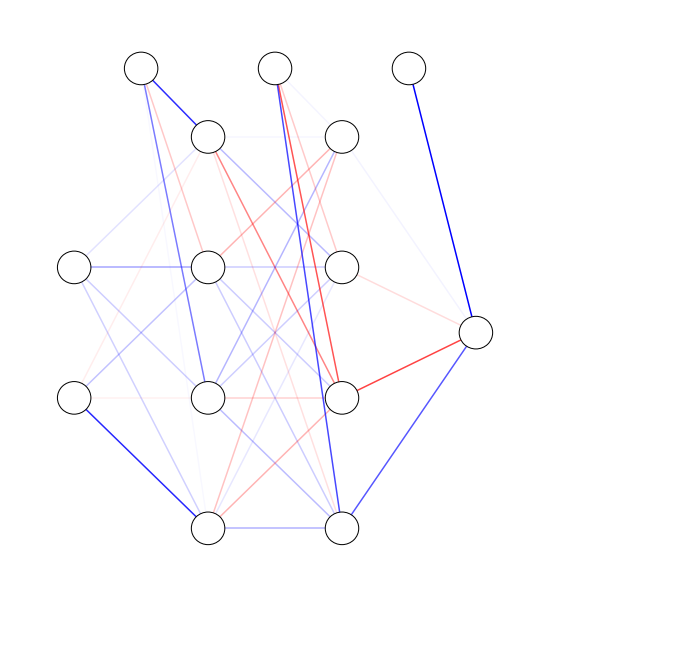

Please press enter to close the figure.


<Figure size 432x288 with 0 Axes>

In [18]:
import numpy as np
from sklearn.neural_network import MLPRegressor as MLP

X_train = np.random.rand(2,2)
y_train = np.random.rand(2,)

my_hidden_layer_sizes = (4,4)
XOR_MLP = MLP(
    activation='tanh',
    alpha=0.99,
    batch_size='auto',
    beta_1=0.9,
    beta_2=0.999,
    early_stopping=False,
    epsilon=1e-08,
    hidden_layer_sizes= my_hidden_layer_sizes,
    learning_rate='constant',
    learning_rate_init = 0.1,
    max_iter=5000,
    momentum=0.5,
    nesterovs_momentum=True,
    power_t=0.5,
    random_state=0,
    shuffle=True,
    solver='sgd',
    tol=0.0001,
    validation_fraction=0.1,
    verbose=False,
    warm_start=False)
XOR_MLP.fit(X_train,y_train)
    
# Read layer weights and bias weights together
weights = XOR_MLP.coefs_
biases_weights = XOR_MLP.intercepts_

brain_MLP = Brain(Libs.Sklearn)
brain_MLP.visualize([weights,biases_weights],load_from_path=True)
